In [1]:
import pandas as pd

# Chemin vers votre fichier JSON
json_file_path = 'fichier.json'

# Charger les données depuis le fichier JSON dans un DataFrame pandas
df = pd.read_json(json_file_path)

# Afficher les premières lignes du DataFrame
print(df.head())


   id    debt_type  principal  interest_rate maturity_date payment_due_date  \
0   1         loan      50000          0.050    2025-12-31       2024-12-01   
1   2         bond      30000          0.030    2026-12-31       2024-11-15   
2   3     mortgage     200000          0.040    2035-01-01       2024-12-20   
3   4  credit line      10000          0.060    2025-06-30       2024-10-15   
4   5         loan      80000          0.045    2027-06-30       2024-12-10   

   amount_paid  outstanding_balance                           description  
0        10000                40000      Bank loan for equipment purchase  
1         5000                25000         Corporate bond issued in 2024  
2        15000               185000          Mortgage for office building  
3         2000                 8000  Credit line for operational expenses  
4        12000                68000            Loan for company expansion  


In [26]:
import pandas as pd
import numpy as np

# Chargement des données de la table Debt
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8],
    "debt_type": ['loan', 'bond', 'mortgage', 'credit line', 'loan', 'bond', 'loan', 'credit line'],
    "principal": [50000, 30000, 200000, 10000, 80000, 50000, 25000, 15000],
    "interest_rate": [0.05, 0.03, 0.04, 0.06, 0.045, 0.025, 0.06, 0.055],
    "maturity_date": ['2025-12-31', '2026-12-31', '2035-01-01', '2025-06-30', '2027-06-30', '2026-09-15', '2028-03-31', '2025-12-31'],
    "payment_due_date": ['2024-12-01', '2024-11-15', '2024-12-20', '2024-10-15', '2024-12-10', '2024-11-30', '2024-12-05', '2024-11-25'],
    "amount_paid": [10000, 5000, 15000, 2000, 12000, 7000, 5000, 3000],
    "outstanding_balance": [40000, 25000, 185000, 8000, 68000, 43000, 20000, 12000],
    "description": [
        'Bank loan for equipment purchase',
        'Corporate bond issued in 2024',
        'Mortgage for office building',
        'Credit line for operational expenses',
        'Loan for company expansion',
        'Government bond issued in 2023',
        'Short-term loan for working capital',
        'Extended credit line for seasonal operations'
    ]
}

df = pd.DataFrame(data)

# Nombre d'augmentations par enregistrement
N = 1000  # Changez ce nombre selon vos besoins

# Augmentation des données
augmented_data = []

for index, row in df.iterrows():
    for _ in range(N):  # Créer N augmentations pour chaque enregistrement
        new_row = row.copy()
        new_row['id'] = df['id'].max() + 1  # nouvel ID
        new_row['principal'] += np.random.randint(-5000, 5000)  # variation aléatoire
        new_row['amount_paid'] += np.random.randint(-2000, 2000)
        new_row['outstanding_balance'] += np.random.randint(-2000, 2000)
        
        # Changer le type de dette
        new_row['debt_type'] = np.random.choice(['loan', 'bond', 'mortgage', 'credit line', 'personal loan', 'auto loan'])
        
        # Modifier le taux d'intérêt
        new_row['interest_rate'] += np.random.uniform(-0.01, 0.01)  # variation aléatoire du taux d'intérêt
        
        # Modifier les dates
        new_row['maturity_date'] = pd.to_datetime(row['maturity_date']) + pd.DateOffset(days=np.random.randint(0, 365))
        new_row['payment_due_date'] = pd.to_datetime(row['payment_due_date']) + pd.DateOffset(days=np.random.randint(0, 30))
        
        # Modifier la description
        new_row['description'] = f"Augmented: {row['description']}"
        
        augmented_data.append(new_row)

# Créer un DataFrame pour les nouvelles données
augmented_df = pd.DataFrame(augmented_data)

# Combiner les données originales et augmentées
combined_df = pd.concat([df, augmented_df], ignore_index=True)
# Dictionnaire de mapping pour les types de dette
debt_type_mapping = {
    'loan': 0.1,
    'bond': 0.12,
    'mortgage': 0.13,
    'credit line': 0.14,
    'personal loan': 0.15,
    'auto loan': 0.11
}

# Numériser la colonne 'debt_type' dans le DataFrame
combined_df['debt_type'] = combined_df['debt_type'].replace(debt_type_mapping)

print(f"Nombre d'entrées après augmentation : {len(combined_df)}")
print(combined_df)


Nombre d'entrées après augmentation : 8008
      id  debt_type  principal  interest_rate        maturity_date  \
0      1       0.10      50000       0.050000           2025-12-31   
1      2       0.12      30000       0.030000           2026-12-31   
2      3       0.13     200000       0.040000           2035-01-01   
3      4       0.14      10000       0.060000           2025-06-30   
4      5       0.10      80000       0.045000           2027-06-30   
...   ..        ...        ...            ...                  ...   
8003   9       0.14      10783       0.063216  2026-08-01 00:00:00   
8004   9       0.15      16757       0.048062  2026-12-15 00:00:00   
8005   9       0.11      16818       0.051555  2026-07-27 00:00:00   
8006   9       0.11      16857       0.055988  2026-06-14 00:00:00   
8007   9       0.12      16849       0.052529  2026-01-31 00:00:00   

         payment_due_date  amount_paid  outstanding_balance  \
0              2024-12-01        10000               

In [27]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes numériques à utiliser pour le clustering et la classification
features = ['principal', 'interest_rate', 'amount_paid', 'outstanding_balance','debt_type']

# Standardiser les données
scaler = StandardScaler()
X = scaler.fit_transform(combined_df[features])

print(X[:5])  # Afficher les premières lignes des données standardisées

[[-0.13020154  0.32051947  0.59390611 -0.18697617 -1.47747701]
 [-0.47520279 -1.14304634 -0.53894377 -0.46400425 -0.30504121]
 [ 2.45730785 -0.41126343  1.72675599  2.49096198  0.28117669]
 [-0.82020404  1.05230238 -1.21865369 -0.77796942  0.86739459]
 [ 0.38730034 -0.04537198  1.04704606  0.33014292 -1.47747701]]


In [28]:
from sklearn.cluster import KMeans

# Appliquer K-means avec un nombre de clusters (exemple : 3)
kmeans = KMeans(n_clusters=5, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(X)

print(combined_df[['id', 'cluster']].head())  # Afficher les clusters assignés

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   id  cluster
0   1        3
1   2        2
2   3        1
3   4        0
4   5        3


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, combined_df['cluster'], test_size=0.2, random_state=42)

# Entraîner le modèle K-NN avec K=5 voisins
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédire les clusters sur les données de test
y_pred = knn.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9956304619225967
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       292
           1       1.00      1.00      1.00       197
           2       0.99      1.00      0.99       416
           3       1.00      1.00      1.00       383
           4       1.00      0.99      1.00       314

    accuracy                           1.00      1602
   macro avg       1.00      1.00      1.00      1602
weighted avg       1.00      1.00      1.00      1602



In [39]:
# Nouvelle donnée à classer : principal = 60000, interest_rate = 0.04, amount_paid = 5000, outstanding_balance = 55000
new_debt = [[60000, 0.04, 5000, 55000,0.1]]

# Normaliser la nouvelle donnée avec le scaler précédent
new_debt_scaled = scaler.transform(new_debt)

# Prédire le cluster de la nouvelle donnée
predicted_cluster = knn.predict(new_debt_scaled)
print("Cluster prédit:", predicted_cluster[0])

Cluster prédit: 2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


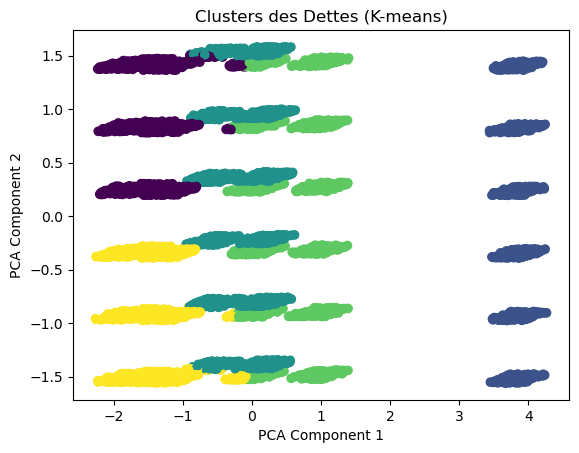

In [37]:
import matplotlib.pyplot as plt

# Réduction des dimensions pour la visualisation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Affichage des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=combined_df['cluster'], cmap='viridis')
plt.title('Clusters des Dettes (K-means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [40]:
# Par exemple, nous allons prédire l'outstanding_balance
X = combined_df[['debt_type', 'principal', 'interest_rate', 'amount_paid']]  # Caractéristiques
y = combined_df['outstanding_balance']  # Objectif


In [41]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Ajuster le scaler sur l'ensemble d'entraînement et transformer les ensembles
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train_scaled, y_train)


LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédire avec l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluer la performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 10452454.92
R² Score: 1.00


In [45]:
# Exemple de nouvelles données
new_data = pd.DataFrame({
    'debt_type': [1],  # Utiliser la version numérisée
    'principal': [60000],
    'interest_rate': [0.05],
    'amount_paid': [20000]
})

# Normaliser les nouvelles données
new_data_scaled = scaler.transform(new_data)

# Prédire l'outstanding_balance
predicted_balance = model.predict(new_data_scaled)
print(f"Predicted Outstanding Balance: {predicted_balance[0]:.2f}")


Predicted Outstanding Balance: 43716.91
